In [64]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


Here we will just show the original image:

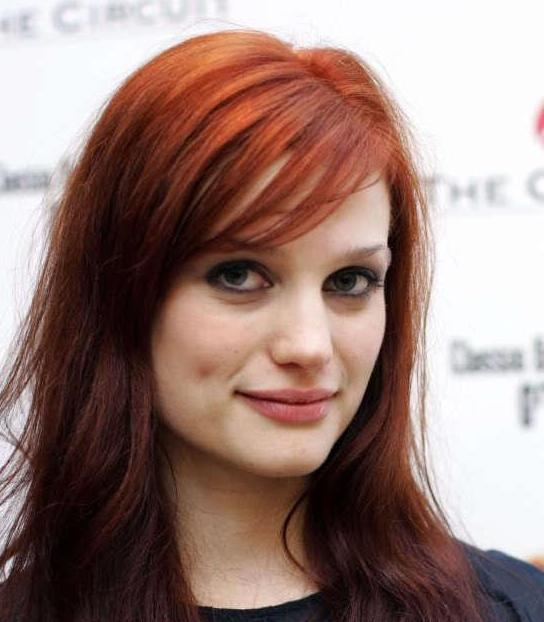

In [65]:
from IPython.display import Image, display
original = Image('/gdrive/My Drive/Colab Notebooks/VGGFacesV2/n000002 (1)/0001_01.jpg')
display(original)

New we will use DNN to detect face:

In [0]:
from __future__ import division
import cv2
import time
import sys
import dlib

In [0]:
def detectFaceOpenCVDnn(net, frame):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], False, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight / 150)), 8)
    return frameOpencvDnn, bboxes

In [0]:
def faceDetectionOnImg(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    outOpencvDnn, bboxes = detectFaceOpenCVDnn(net, img)
    outOpencvDnn = cv2.cvtColor(outOpencvDnn, cv2.COLOR_RGB2BGR)
    cv2.imwrite("/gdrive/My Drive/Colab Notebooks/tmp/outputDnn.jpg", outOpencvDnn)
    faces = dlib.full_object_detections()
    bbox = bboxes[0]
    faces.append(sp(img, dlib.rectangle(max(bbox[0], 0), max(bbox[1], 0), bbox[2], bbox[3])))
    image = dlib.get_face_chip(img, faces[0], size=224, padding=0.2)
    return image

In [0]:
modelFile = "/gdrive/My Drive/Colab Notebooks/project/VGGFace2/Deep_networks/models/opencv_face_detector_uint8.pb"
configFile = "/gdrive/My Drive/Colab Notebooks/project/VGGFace2/Deep_networks/models/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

conf_threshold = 0.7

predictor_path = "/gdrive/My Drive/Colab Notebooks/project/VGGFace2/shape_predictor_5_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)

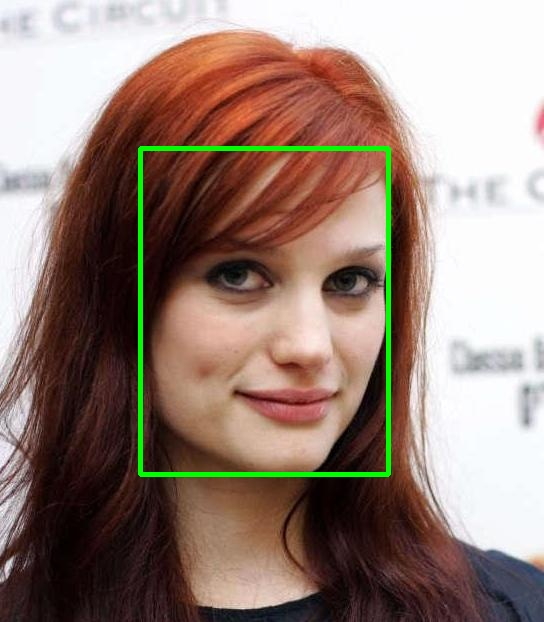

In [70]:
face_file_path = "/gdrive/My Drive/Colab Notebooks/VGGFacesV2/n000002 (1)/0001_01.jpg"
imageTest = cv2.imread(face_file_path)
outOpencvDnn = faceDetectionOnImg(imageTest)
outOpencvDnn = cv2.cvtColor(outOpencvDnn, cv2.COLOR_RGB2BGR)
cv2.imwrite("/gdrive/My Drive/Colab Notebooks/tmp/preprocessed.jpg", outOpencvDnn)
display(Image("/gdrive/My Drive/Colab Notebooks/tmp/outputDnn.jpg"))


And after the face alignement (rotation, centering) and a resize for the network (224\*224 here), that give:

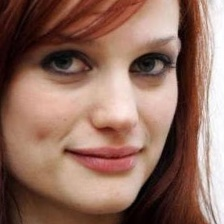

In [71]:
display(Image("/gdrive/My Drive/Colab Notebooks/tmp/preprocessed.jpg"))